# GEQIE MFRQI encoding Cosmic Web snapshot

This is an example presents how to use GEQIE framework for encoding Cosmic Web snapshots into its quantum representation using MFRQI method [(Li et al., 2014)](https://link.springer.com/article/10.1007/s11128-013-0705-7).

## Setup

### Imports

In [112]:
from pathlib import Path
from itertools import product

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates["latex"] = pio.templates["plotly_white"].update(
    layout=dict(
        colorway=px.colors.qualitative.D3,
        font=dict(
            family="CMU Serif",
            size=12
        )
    )
)

pio.templates.default = "latex"

In [113]:
import geqie
from geqie.encodings import mfrqi

### Helper Functions

In [114]:
def plot_meshgrid_isosurfaces(snapshot_data: np.ndarray, title="", n_isosurfaces=5, opacity=0.4):
    nx, ny, nz = snapshot_data.shape
    X, Y, Z = np.meshgrid(range(nx), range(ny), range(nz), indexing="ij")

    fig = go.Figure(
        data=go.Volume(
            x=X.flatten(),
            y=Y.flatten(),
            z=Z.flatten(),
            value=snapshot_data.flatten(),
            isomin=snapshot_data.min(),
            isomax=snapshot_data.max(),
            opacity=opacity,
            surface_count=n_isosurfaces,
            caps=dict(x_show=False, y_show=False, z_show=False),
            colorscale="Blues",
        )
    )

    fig.update_layout(
        title=title,
        scene_aspectmode="data", 
        margin=dict(l=0, r=0, b=0, t=40), 
        scene=dict(
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5),
                center=dict(x=0, y=0, z=-0.2),
            )
        ),
    )

    return fig


## Encoding

### Displaying the image

In [115]:
DATA_PATH = Path("data")
PLOTS_PATH = Path("plots")

data_raw = np.load(DATA_PATH / "hd_snapshot_data_mass.npy")
# data_e_normalize_median_squared_hd = np.load(DATA_PATH / "hd_snapshot_data_e_normalized_median_square_mass.npy")

#### Scaling down

In [116]:
TARGET_SIZE = 8

factor = data_raw.shape[0] // TARGET_SIZE
data = data_raw.reshape(
    TARGET_SIZE, factor, TARGET_SIZE, factor, TARGET_SIZE, factor
).sum(axis=(1, 3, 5))

print(data.shape)

(8, 8, 8)


In [117]:
fig = plot_meshgrid_isosurfaces(data, title="Visualization of the downscaled Cosmic Web snapshot")
fig.show()
fig.write_image(PLOTS_PATH / "mfrqi_original_snapshot.pdf")

### Normalization

In [126]:
NORMALIZATION_METRIC = np.median(data)
snapshot_e_normalize_median = 1 - np.exp(-(data / NORMALIZATION_METRIC))

print(NORMALIZATION_METRIC)

121391.5833530426


In [127]:
fig = plot_meshgrid_isosurfaces(snapshot_e_normalize_median, title="Visualization of the downscaled Cosmic Web snapshot")
fig.show()
fig.write_image(PLOTS_PATH / "mfrqi_original_snapshot_e_normalized_median.pdf")

### Encoding using unitary gate

In [128]:
circuit = geqie.encode(mfrqi.init_function, mfrqi.data_function, mfrqi.map_function, snapshot_e_normalize_median, image_dimensionality=3)
circuit.draw(output="text")

»
    q_0: »
         »
    q_1: »
         »
    q_2: »
         »
    q_3: »
         »
    q_4: »
         »
    q_5: »
         »
    q_6: »
         »
    q_7: »
         »
    q_8: »
         »
    q_9: »
         »
meas: 10/»
         »
«         ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

### Simulating the circuit

The stemplot represents the number of results for each possible quantum state of the system with decimal basis where, e.g., $\ket{13} \equiv \ket{01101}$.

Text(0, 0.5, 'n_results')

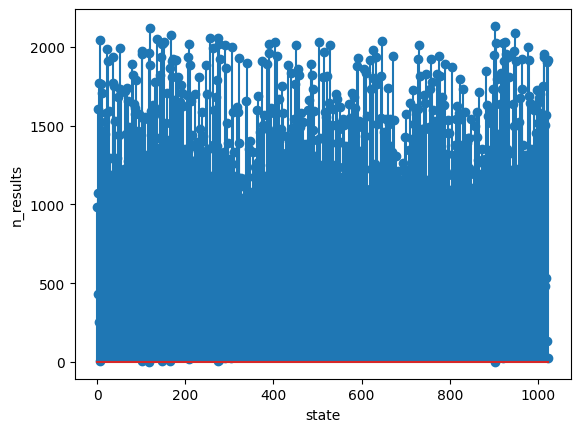

In [134]:
result = geqie.simulate(circuit, 2**20, return_padded_counts=True)
plt.stem(result.values())
plt.xlabel("state")
plt.ylabel("n_results")

## Retrieving the image

In [135]:
retrieved_snapshot = mfrqi.retrieve_function(result, image_dimensionality=3)
fig = plot_meshgrid_isosurfaces(retrieved_snapshot, title="Retrieved 3D Normalized Image")
fig.show()
fig.write_image(PLOTS_PATH / "mfrqi_retrieved_3d_normalized_image.pdf")

In [136]:
pcc, p_value = stats.pearsonr(snapshot_e_normalize_median.flatten(), retrieved_snapshot.flatten())
print(f"{pcc=:.3f}, {p_value=:.3e}")

pcc=0.999, p_value=0.000e+00


In [137]:
denormalized_snapshot = -NORMALIZATION_METRIC * np.log(1 - retrieved_snapshot + 1e-60)
fig = plot_meshgrid_isosurfaces(denormalized_snapshot, title="Retrieved 3D Image")
fig.show()
fig.write_image(PLOTS_PATH / "mfrqi_retrieved_3d_image.pdf")

In [138]:
pcc, p_value = stats.pearsonr(data.flatten(), denormalized_snapshot.flatten())
print(f"{pcc=:.3f}, {p_value=:.3e}")

pcc=0.995, p_value=0.000e+00
